# Case Study – UK Road Safety

## About Case study

A digital agency has been approached by several organisations interested in  road safety in the UK (Driver and Vehicle Standards Agency, brake.org, The AA, The RAC).  

These organisations would like to collaborate on a digital safety campaign covering all road users but want to make it geographically targeted and **focus on serious and fatal accidents only.** 

They would like to rent up to 20 digital advertising boards throughout the UK but want to place them in the areas they would have most impact and include some key attributes about road safety for everyone who uses the road.  

**The objective is to identify where the digital advertising boards should be located and include several additional factors to be aware of to improve road safety.  ** 


In [1]:
# install necessary packages

install.packages('ggplot2')
install.packages('dplyr')
install.packages('directlabels')

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)
also installing the dependencies 'viridisLite', 'scales'

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)
also installing the dependencies 'bindr', 'bindrcpp', 'glue', 'rlang', 'Rcpp', 'tibble', 'plogr'

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)


### Load datasets

In [2]:
# Load datasets

accidents_2016 <- read.csv('https://onedrive.live.com/download?cid=0CDFE5661336D233&resid=CDFE5661336D233%21133&authkey=AJQ560wVf1UNpY0', header=TRUE, stringsAsFactor=FALSE)

accidents_2015 <- read.csv('https://onedrive.live.com/download?cid=0CDFE5661336D233&resid=CDFE5661336D233%21132&authkey=APVwsRXQ_FCQdF0', header=TRUE, stringsAsFactor=FALSE)

accidents_0514 <- read.csv('https://onedrive.live.com/download?cid=0CDFE5661336D233&resid=CDFE5661336D233%21136&authkey=ALHbP-pqq1cpYvI', header=TRUE, stringsAsFactor=FALSE)

casualties_0514 <- read.csv('https://onedrive.live.com/download?cid=0CDFE5661336D233&resid=CDFE5661336D233%21135&authkey=AASDZupXwpCiyG8', header=TRUE, stringsAsFactor=FALSE)

casualties_2015 <- read.csv('https://onedrive.live.com/download?cid=0CDFE5661336D233&resid=CDFE5661336D233%21137&authkey=AJdNOw2bryDHf0U', header=TRUE, stringsAsFactor=FALSE)

casualties_2016 <- read.csv('https://onedrive.live.com/download?cid=0CDFE5661336D233&resid=CDFE5661336D233%21138&authkey=AEIp_ivxQOR6Dgw', header=TRUE, stringsAsFactor=FALSE)

vehicles_0514 <- read.csv('https://onedrive.live.com/download?cid=0CDFE5661336D233&resid=CDFE5661336D233%21134&authkey=AOVfxMTrPPfdRKk', header=TRUE, stringsAsFactor=FALSE)

vehicles_2015 <- read.csv('https://onedrive.live.com/download?cid=0CDFE5661336D233&resid=CDFE5661336D233%21140&authkey=AJXkylRn_xNanSY', header=TRUE, stringsAsFactor=FALSE)

vehicles_2016 <- read.csv('https://onedrive.live.com/download?cid=0CDFE5661336D233&resid=CDFE5661336D233%21139&authkey=AKcXlLZm7jti5hQ', header=TRUE, stringsAsFactor=FALSE)

LA_district <- read.csv('https://onedrive.live.com/download?cid=0CDFE5661336D233&resid=CDFE5661336D233%21149&authkey=ABxNPIFDkJetal4', sep='\t',header=TRUE, strip.white=TRUE)

LA_highway <- read.csv('https://onedrive.live.com/download?cid=0CDFE5661336D233&resid=CDFE5661336D233%21148&authkey=ACacDXoq3qNmMfk', sep='\t',header=TRUE, strip.white=TRUE)

LSOA <- read.csv('https://onedrive.live.com/download?cid=0CDFE5661336D233&resid=CDFE5661336D233%21151&authkey=AJU3J9PFJ0cRzYM', sep='\t',header=TRUE, strip.white=TRUE)

**Captured LSOA names based on LSOA codes from the link below:**  

https://data.england.nhs.uk/dataset/ods-data-supplied-by-the-office-of-national-statistics/resource/38f809c2-83c0-46cf-9599-2941d426bb7f

### Merge all three accident datasets

In [3]:
accidents_2016$data_year <- '2016'
accidents_2015$data_year <- '2015'
accidents_0514$data_year <- '0514'

In [4]:
colnames(accidents_0514)[1] = 'Accident_Index'

In [5]:
accidents_2016$Speed_limit <- as.integer(accidents_2016$Speed_limit)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [6]:
# Merge all three accident datasets (2016, 2015 and 0514)

accidents_1615 <- merge(accidents_2016, accidents_2015, all=TRUE)
accidents <- merge(accidents_1615, accidents_0514, all=TRUE)
table(accidents$data_year)


   0514    2015    2016 
1640597  140056  136621 

In [7]:
# Let's examine the structure of accidents dataset

str(accidents)

'data.frame':	1917274 obs. of  33 variables:
 $ Accident_Index                             : chr  "200501BS00001" "200501BS00002" "200501BS00003" "200501BS00004" ...
 $ Location_Easting_OSGR                      : int  525680 524170 524520 526900 528060 524770 524220 525890 527350 524550 ...
 $ Location_Northing_OSGR                     : int  178240 181650 182240 177530 179040 181160 180830 179710 177650 180810 ...
 $ Longitude                                  : num  -0.191 -0.212 -0.206 -0.174 -0.157 ...
 $ Latitude                                   : num  51.5 51.5 51.5 51.5 51.5 ...
 $ Police_Force                               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Accident_Severity                          : int  2 3 3 3 3 3 3 3 3 3 ...
 $ Number_of_Vehicles                         : int  1 1 2 1 1 2 2 1 2 2 ...
 $ Number_of_Casualties                       : int  1 1 1 1 1 1 1 2 2 5 ...
 $ Date                                       : chr  "04/01/2005" "05/01/2005" "06/01/2005" "07/01

### Merge all three casualties datasets

In [8]:
colnames(casualties_0514)[1] = 'Accident_Index'

In [9]:
casualties_2016$data_year <- '2016'
casualties_2015$data_year <- '2015'
casualties_0514$data_year <- '0514'

In [10]:
# Merge all three casualties datasets (2016, 2015 and 0514)

casualties_1615 <- merge(casualties_2016, casualties_2015, all=TRUE)
casualties <- merge(casualties_1615, casualties_0514, all=TRUE)
table(casualties$data_year)


   0514    2015    2016 
2216720  186189  181384 

In [11]:
# Let's examine the structure of Casualties dataset

str(casualties)

'data.frame':	2584293 obs. of  17 variables:
 $ Accident_Index                    : chr  "200501BS00001" "200501BS00002" "200501BS00003" "200501BS00004" ...
 $ Vehicle_Reference                 : int  1 1 2 1 1 2 1 1 1 1 ...
 $ Casualty_Reference                : int  1 1 1 1 1 1 1 1 2 1 ...
 $ Casualty_Class                    : int  3 2 1 3 1 1 1 3 3 1 ...
 $ Sex_of_Casualty                   : int  1 1 1 1 1 2 1 2 2 1 ...
 $ Age_of_Casualty                   : int  37 37 62 30 49 30 31 13 13 35 ...
 $ Age_Band_of_Casualty              : int  7 7 9 6 8 6 6 3 3 6 ...
 $ Casualty_Severity                 : int  2 3 3 3 3 3 3 3 3 3 ...
 $ Pedestrian_Location               : int  1 0 0 5 0 0 0 6 6 0 ...
 $ Pedestrian_Movement               : int  1 0 0 2 0 0 0 9 9 0 ...
 $ Car_Passenger                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Bus_or_Coach_Passenger            : int  0 4 0 0 0 0 0 0 0 0 ...
 $ Pedestrian_Road_Maintenance_Worker: int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ Casu

### Merge all three vehicles datasets

In [12]:
vehicles_0514$Vehicle_IMD_Decile <- NA

In [13]:
vehicles_0514$Vehicle_IMD_Decile <- as.integer(vehicles_0514$Vehicle_IMD_Decile)

In [14]:
colnames(vehicles_0514)[1] = 'Accident_Index'

In [15]:
vehicles_2016$data_year <- '2016'
vehicles_2015$data_year <- '2015'
vehicles_0514$data_year <- '0514'

In [16]:
# Merge all three vehicles datasets (2016, 2015 and 0514)

vehicles_1615 <- merge(vehicles_2016, vehicles_2015, all=TRUE)
vehicles <- merge(vehicles_1615, vehicles_0514, all=TRUE)
table(vehicles$data_year)


   0514    2015    2016 
3004425  257845  252500 

In [17]:
# Let's examine the structure of Vehicles dataset

str(vehicles)


'data.frame':	3514770 obs. of  24 variables:
 $ Accident_Index                  : chr  "200501BS00001" "200501BS00002" "200501BS00003" "200501BS00003" ...
 $ Vehicle_Reference               : int  1 1 1 2 1 1 1 2 1 2 ...
 $ Vehicle_Type                    : int  9 11 11 9 9 3 9 3 3 9 ...
 $ Towing_and_Articulation         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Vehicle_Manoeuvre               : int  18 4 17 2 18 18 5 18 18 2 ...
 $ Vehicle_Location.Restricted_Lane: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Junction_Location               : int  0 3 0 0 0 0 0 0 1 1 ...
 $ Skidding_and_Overturning        : int  0 0 0 0 0 1 0 0 0 0 ...
 $ Hit_Object_in_Carriageway       : int  0 0 4 0 0 10 0 0 4 0 ...
 $ Vehicle_Leaving_Carriageway     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hit_Object_off_Carriageway      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X1st_Point_of_Impact            : int  1 4 4 3 1 1 0 0 1 2 ...
 $ Was_Vehicle_Left_Hand_Drive.    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Journey_Purpose_of_Driver       : int  15

### Exploring accidents dataset

Adding new variables as necessary

In [18]:
str(accidents)

'data.frame':	1917274 obs. of  33 variables:
 $ Accident_Index                             : chr  "200501BS00001" "200501BS00002" "200501BS00003" "200501BS00004" ...
 $ Location_Easting_OSGR                      : int  525680 524170 524520 526900 528060 524770 524220 525890 527350 524550 ...
 $ Location_Northing_OSGR                     : int  178240 181650 182240 177530 179040 181160 180830 179710 177650 180810 ...
 $ Longitude                                  : num  -0.191 -0.212 -0.206 -0.174 -0.157 ...
 $ Latitude                                   : num  51.5 51.5 51.5 51.5 51.5 ...
 $ Police_Force                               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Accident_Severity                          : int  2 3 3 3 3 3 3 3 3 3 ...
 $ Number_of_Vehicles                         : int  1 1 2 1 1 2 2 1 2 2 ...
 $ Number_of_Casualties                       : int  1 1 1 1 1 1 1 2 2 5 ...
 $ Date                                       : chr  "04/01/2005" "05/01/2005" "06/01/2005" "07/01

In [19]:
summary(accidents)

 Accident_Index     Location_Easting_OSGR Location_Northing_OSGR
 Length:1917274     Min.   : 64950        Min.   :  10290       
 Class :character   1st Qu.:377346        1st Qu.: 177890       
 Mode  :character   Median :442260        Median : 263260       
                    Mean   :440787        Mean   : 297788       
                    3rd Qu.:523810        3rd Qu.: 396070       
                    Max.   :655540        Max.   :1208800       
                    NA's   :145           NA's   :145           
   Longitude          Latitude      Police_Force   Accident_Severity
 Min.   :-7.5162   Min.   :49.91   Min.   : 1.00   Min.   :1.000    
 1st Qu.:-2.3413   1st Qu.:51.49   1st Qu.: 7.00   1st Qu.:3.000    
 Median :-1.3741   Median :52.25   Median :31.00   Median :3.000    
 Mean   :-1.4198   Mean   :52.57   Mean   :30.69   Mean   :2.837    
 3rd Qu.:-0.2111   3rd Qu.:53.46   3rd Qu.:46.00   3rd Qu.:3.000    
 Max.   : 1.7620   Max.   :60.76   Max.   :98.00   Max.   :3.000  

In [20]:
# Replace -1 & '' with NAs in accidents dataset

accidents$X1st_Road_Number[accidents$X1st_Road_Number==-1] <- NA
accidents$Road_Type[accidents$Road_Type==-1] <- NA
accidents$Junction_Detail[accidents$Junction_Detail==-1] <- NA
accidents$Junction_Control[accidents$Junction_Control==-1] <- NA
accidents$X2nd_Road_Class[accidents$X2nd_Road_Class==-1] <- NA
accidents$X2nd_Road_Number[accidents$X2nd_Road_Number==-1] <- NA
accidents$Pedestrian_Crossing.Human_Control[accidents$Pedestrian_Crossing.Human_Control==-1] <- NA
accidents$Pedestrian_Crossing.Physical_Facilities[accidents$Pedestrian_Crossing.Physical_Facilities==-1] <- NA
accidents$Light_Conditions[accidents$Light_Conditions==-1] <- NA
accidents$Weather_Conditions[accidents$Weather_Conditions==-1] <- NA
accidents$Road_Surface_Conditions[accidents$Road_Surface_Conditions==-1] <- NA
accidents$Special_Conditions_at_Site[accidents$Special_Conditions_at_Site==-1] <- NA
accidents$Carriageway_Hazards[accidents$Carriageway_Hazards==-1] <- NA
accidents$Urban_or_Rural_Area[accidents$Urban_or_Rural_Area==-1] <- NA
accidents$Did_Police_Officer_Attend_Scene_of_Accident[accidents$Did_Police_Officer_Attend_Scene_of_Accident==-1] <- NA
accidents$LSOA_of_Accident_Location[accidents$LSOA_of_Accident_Location==''] <- NA

In [21]:
# Format date
accidents$Date <- as.Date(accidents$Date, format = "%d/%m/%Y")

In [22]:
# Extract Month
accidents$Month <- months(accidents$Date)
accidents$Month <- factor(accidents$Month, levels = c('January','February','March','April','May','June','July','August','September','October','November','December'))
table(accidents$Month)


  January  February     March     April       May      June      July    August 
   153857    142323    153319    147545    162072    162219    168401    157275 
September   October  November  December 
   164925    172805    175525    157008 

In [23]:
# Assign weekday to respective label

accidents$weekday <- ifelse(accidents$Day_of_Week==1,'Sunday',
                     ifelse(accidents$Day_of_Week==2,'Monday',
                     ifelse(accidents$Day_of_Week==3,'Tuesday',
                     ifelse(accidents$Day_of_Week==4,'Wednesday',
                     ifelse(accidents$Day_of_Week==5,'Thursday',
                     ifelse(accidents$Day_of_Week==6,'Friday',
                     ifelse(accidents$Day_of_Week==7,'Saturday',"")))))))

table(accidents$weekday)


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
   313938    272546    255926    210350    288443    286810    289261 

In [24]:
# Bucket accident time into 4 zones
## midnight to 6AM = early morning, 6AM - 12PM = morning, 12PM - 6PM = afternoon, 6PM - 12AM = evening

accidents$timezone <- ifelse((as.integer(substr(accidents$Time,1,2))>=0) & (as.integer(substr(accidents$Time,1,2))<6),'early morning',
                 ifelse((as.integer(substr(accidents$Time,1,2))>=6) & (as.integer(substr(accidents$Time,1,2))<12),'morning',
                 ifelse((as.integer(substr(accidents$Time,1,2))>=12) & (as.integer(substr(accidents$Time,1,2))<18),'afternoon',
                 ifelse((as.integer(substr(accidents$Time,1,2))>=18) & (as.integer(substr(accidents$Time,1,2))<24),'evening',''))))

In [25]:
# Convert timezone variable to factor

accidents$timezone <- factor(accidents$timezone, levels = c('early morning', 'morning', 'afternoon', 'evening'))
addmargins(table(accidents$timezone))


early morning       morning     afternoon       evening           Sum 
       107584        536065        818943        454529       1917121 

In [26]:
# Extract year

accidents$Year <- as.numeric(format(accidents$Date,"%Y"))


In [27]:
# Convert Year to factor

accidents$Year <- factor(accidents$Year)
table(accidents$Year)


  2005   2006   2007   2008   2009   2010   2011   2012   2013   2014   2015 
198735 189161 182115 170591 163554 154414 151474 145571 138660 146322 140056 
  2016 
136621 

In [28]:
summary(accidents)

 Accident_Index     Location_Easting_OSGR Location_Northing_OSGR
 Length:1917274     Min.   : 64950        Min.   :  10290       
 Class :character   1st Qu.:377346        1st Qu.: 177890       
 Mode  :character   Median :442260        Median : 263260       
                    Mean   :440787        Mean   : 297788       
                    3rd Qu.:523810        3rd Qu.: 396070       
                    Max.   :655540        Max.   :1208800       
                    NA's   :145           NA's   :145           
   Longitude          Latitude      Police_Force   Accident_Severity
 Min.   :-7.5162   Min.   :49.91   Min.   : 1.00   Min.   :1.000    
 1st Qu.:-2.3413   1st Qu.:51.49   1st Qu.: 7.00   1st Qu.:3.000    
 Median :-1.3741   Median :52.25   Median :31.00   Median :3.000    
 Mean   :-1.4198   Mean   :52.57   Mean   :30.69   Mean   :2.837    
 3rd Qu.:-0.2111   3rd Qu.:53.46   3rd Qu.:46.00   3rd Qu.:3.000    
 Max.   : 1.7620   Max.   :60.76   Max.   :98.00   Max.   :3.000  

In [29]:
# Find missing values in accidents datasets

na_count <-sapply(accidents, function(y) sum(length(which(is.na(y)))))
na_count <- data.frame(na_count)
na_count

,na_count
Accident_Index,0
Location_Easting_OSGR,145
Location_Northing_OSGR,145
Longitude,145
Latitude,145
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0


In [30]:
# Subset serious and fatal accidents in accidents dataset

accidents_sf <- subset(accidents, Accident_Severity==1 | Accident_Severity==2)
addmargins(table(accidents_sf$Accident_Severity))


     1      2    Sum 
 24693 263805 288498 

In [31]:
# Find missing values in subset of accidents datasets (Fatal and Serious)

na_count <-sapply(accidents_sf, function(y) sum(length(which(is.na(y)))))
na_count <- data.frame(na_count)
na_count

,na_count
Accident_Index,0
Location_Easting_OSGR,23
Location_Northing_OSGR,23
Longitude,23
Latitude,23
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0


## Exploring casualties dataset

In [32]:
summary(casualties)

 Accident_Index     Vehicle_Reference Casualty_Reference Casualty_Class 
 Length:2584293     Min.   : 1.000    Min.   :  1.000    Min.   :1.000  
 Class :character   1st Qu.: 1.000    1st Qu.:  1.000    1st Qu.:1.000  
 Mode  :character   Median : 1.000    Median :  1.000    Median :1.000  
                    Mean   : 1.486    Mean   :  1.431    Mean   :1.492  
                    3rd Qu.: 2.000    3rd Qu.:  2.000    3rd Qu.:2.000  
                    Max.   :91.000    Max.   :852.000    Max.   :3.000  
                                                                        
 Sex_of_Casualty  Age_of_Casualty  Age_Band_of_Casualty Casualty_Severity
 Min.   :-1.000   Min.   : -1.00   Min.   :-1.000       Min.   :1.000    
 1st Qu.: 1.000   1st Qu.: 20.00   1st Qu.: 4.000       1st Qu.:3.000    
 Median : 1.000   Median : 31.00   Median : 6.000       Median :3.000    
 Mean   : 1.415   Mean   : 34.62   Mean   : 6.054       Mean   :2.865    
 3rd Qu.: 2.000   3rd Qu.: 47.00   3rd Qu.: 8.

In [33]:
# Replace -1 with NAs in casualties dataset

casualties$Sex_of_Casualty[casualties$Sex_of_Casualty==-1] <- NA
casualties$Age_of_Casualty[casualties$Age_of_Casualty==-1] <- NA
casualties$Age_Band_of_Casualty[casualties$Age_Band_of_Casualty==-1] <- NA
casualties$Pedestrian_Location[casualties$Pedestrian_Location==-1] <- NA
casualties$Pedestrian_Movement[casualties$Pedestrian_Movement==-1] <- NA
casualties$Car_Passenger[casualties$Car_Passenger==-1] <- NA
casualties$Bus_or_Coach_Passenger[casualties$Bus_or_Coach_Passenger==-1] <- NA
casualties$Pedestrian_Road_Maintenance_Worker[casualties$Pedestrian_Road_Maintenance_Worker==-1] <- NA
casualties$Casualty_Home_Area_Type[casualties$Casualty_Home_Area_Type==-1] <- NA

In [34]:
# Check if all -1 are replaced with NA's

summary(casualties)

 Accident_Index     Vehicle_Reference Casualty_Reference Casualty_Class 
 Length:2584293     Min.   : 1.000    Min.   :  1.000    Min.   :1.000  
 Class :character   1st Qu.: 1.000    1st Qu.:  1.000    1st Qu.:1.000  
 Mode  :character   Median : 1.000    Median :  1.000    Median :1.000  
                    Mean   : 1.486    Mean   :  1.431    Mean   :1.492  
                    3rd Qu.: 2.000    3rd Qu.:  2.000    3rd Qu.:2.000  
                    Max.   :91.000    Max.   :852.000    Max.   :3.000  
                                                                        
 Sex_of_Casualty Age_of_Casualty  Age_Band_of_Casualty Casualty_Severity
 Min.   :1.000   Min.   :  0.00   Min.   : 1.0         Min.   :1.000    
 1st Qu.:1.000   1st Qu.: 21.00   1st Qu.: 5.0         1st Qu.:3.000    
 Median :1.000   Median : 32.00   Median : 6.0         Median :3.000    
 Mean   :1.415   Mean   : 35.35   Mean   : 6.2         Mean   :2.865    
 3rd Qu.:2.000   3rd Qu.: 47.00   3rd Qu.: 8.0     

In [35]:
# Subset serious and fatal accidents in casualties dataset

casualties_sf <- subset(casualties,Casualty_Severity==1 | Casualty_Severity==2) 
addmargins(table(casualties_sf$Casualty_Severity))


     1      2    Sum 
 26594 295655 322249 

In [36]:
# Let's examine the structure of subset of casualties (Fatal and Serious accidents)

str(casualties_sf)

'data.frame':	322249 obs. of  17 variables:
 $ Accident_Index                    : chr  "200501BS00001" "200501BS00019" "200501BS00022" "200501BS70003" ...
 $ Vehicle_Reference                 : int  1 1 1 2 1 1 2 1 2 1 ...
 $ Casualty_Reference                : int  1 1 1 2 1 1 1 1 1 1 ...
 $ Casualty_Class                    : int  3 1 3 1 3 1 1 2 1 1 ...
 $ Sex_of_Casualty                   : int  1 1 1 1 1 1 1 1 2 1 ...
 $ Age_of_Casualty                   : int  37 54 NA 28 NA 31 74 42 44 33 ...
 $ Age_Band_of_Casualty              : int  7 8 NA 6 NA 6 10 7 7 6 ...
 $ Casualty_Severity                 : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Pedestrian_Location               : int  1 0 5 0 4 0 0 0 0 0 ...
 $ Pedestrian_Movement               : int  1 0 1 0 1 0 0 0 0 0 ...
 $ Car_Passenger                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Bus_or_Coach_Passenger            : int  0 0 0 0 0 0 0 2 0 0 ...
 $ Pedestrian_Road_Maintenance_Worker: int  NA NA NA NA NA NA NA NA NA NA ...
 $ Ca

## Exploring vehicles dataset

In [37]:
str(vehicles)

'data.frame':	3514770 obs. of  24 variables:
 $ Accident_Index                  : chr  "200501BS00001" "200501BS00002" "200501BS00003" "200501BS00003" ...
 $ Vehicle_Reference               : int  1 1 1 2 1 1 1 2 1 2 ...
 $ Vehicle_Type                    : int  9 11 11 9 9 3 9 3 3 9 ...
 $ Towing_and_Articulation         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Vehicle_Manoeuvre               : int  18 4 17 2 18 18 5 18 18 2 ...
 $ Vehicle_Location.Restricted_Lane: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Junction_Location               : int  0 3 0 0 0 0 0 0 1 1 ...
 $ Skidding_and_Overturning        : int  0 0 0 0 0 1 0 0 0 0 ...
 $ Hit_Object_in_Carriageway       : int  0 0 4 0 0 10 0 0 4 0 ...
 $ Vehicle_Leaving_Carriageway     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hit_Object_off_Carriageway      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X1st_Point_of_Impact            : int  1 4 4 3 1 1 0 0 1 2 ...
 $ Was_Vehicle_Left_Hand_Drive.    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Journey_Purpose_of_Driver       : int  15

In [38]:
summary(vehicles)

 Accident_Index     Vehicle_Reference  Vehicle_Type    Towing_and_Articulation
 Length:3514770     Min.   : 1.000    Min.   :-1.000   Min.   :-1.00000       
 Class :character   1st Qu.: 1.000    1st Qu.: 9.000   1st Qu.: 0.00000       
 Mode  :character   Median : 1.000    Median : 9.000   Median : 0.00000       
                    Mean   : 1.556    Mean   : 9.654   Mean   : 0.03081       
                    3rd Qu.: 2.000    3rd Qu.: 9.000   3rd Qu.: 0.00000       
                    Max.   :91.000    Max.   :98.000   Max.   : 5.00000       
                                                                              
 Vehicle_Manoeuvre Vehicle_Location.Restricted_Lane Junction_Location
 Min.   :-1.00     Min.   :-1.0000                  Min.   :-1.00    
 1st Qu.: 7.00     1st Qu.: 0.0000                  1st Qu.: 0.00    
 Median :17.00     Median : 0.0000                  Median : 1.00    
 Mean   :12.67     Mean   : 0.1326                  Mean   : 2.55    
 3rd Qu.:18.00    

In [39]:
# Replace -1 with NAs in vehicles dataset

vehicles$Vehicle_Type[vehicles$Vehicle_Type==-1] <- NA
vehicles$Towing_and_Articulation[vehicles$Towing_and_Articulation==-1] <- NA
vehicles$Vehicle_Manoeuvre[vehicles$Vehicle_Manoeuvre==-1] <- NA
vehicles$Vehicle_Location.Restricted_Lane[vehicles$Vehicle_Location.Restricted_Lane==-1] <- NA
vehicles$Junction_Location[vehicles$Junction_Location==-1] <- NA
vehicles$Skidding_and_Overturning[vehicles$Skidding_and_Overturning==-1] <- NA
vehicles$Hit_Object_in_Carriageway[vehicles$Hit_Object_in_Carriageway==-1] <- NA
vehicles$Vehicle_Leaving_Carriageway[vehicles$Vehicle_Leaving_Carriageway==-1] <- NA
vehicles$Hit_Object_off_Carriageway[vehicles$Hit_Object_off_Carriageway==-1] <- NA
vehicles$X1st_Point_of_Impact[vehicles$X1st_Point_of_Impact==-1] <- NA
vehicles$Was_Vehicle_Left_Hand_Drive.[vehicles$Was_Vehicle_Left_Hand_Drive.==-1] <- NA
vehicles$Journey_Purpose_of_Driver[vehicles$Journey_Purpose_of_Driver==-1] <- NA
vehicles$Sex_of_Driver[vehicles$Sex_of_Driver==-1] <- NA
vehicles$Age_of_Driver[vehicles$Age_of_Driver==-1] <- NA
vehicles$Age_Band_of_Driver[vehicles$Age_Band_of_Driver==-1] <- NA
vehicles$Engine_Capacity_.CC.[vehicles$Engine_Capacity_.CC.==-1] <- NA
vehicles$Propulsion_Code[vehicles$Propulsion_Code==-1] <- NA
vehicles$Age_of_Vehicle[vehicles$Age_of_Vehicle==-1] <- NA
vehicles$Driver_IMD_Decile[vehicles$Driver_IMD_Decile==-1] <- NA
vehicles$Driver_Home_Area_Type[vehicles$Driver_Home_Area_Type==-1] <- NA



In [40]:
# Let's check if all -1 are replaced with NAs

str(vehicles)

'data.frame':	3514770 obs. of  24 variables:
 $ Accident_Index                  : chr  "200501BS00001" "200501BS00002" "200501BS00003" "200501BS00003" ...
 $ Vehicle_Reference               : int  1 1 1 2 1 1 1 2 1 2 ...
 $ Vehicle_Type                    : int  9 11 11 9 9 3 9 3 3 9 ...
 $ Towing_and_Articulation         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Vehicle_Manoeuvre               : int  18 4 17 2 18 18 5 18 18 2 ...
 $ Vehicle_Location.Restricted_Lane: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Junction_Location               : int  0 3 0 0 0 0 0 0 1 1 ...
 $ Skidding_and_Overturning        : int  0 0 0 0 0 1 0 0 0 0 ...
 $ Hit_Object_in_Carriageway       : int  0 0 4 0 0 10 0 0 4 0 ...
 $ Vehicle_Leaving_Carriageway     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hit_Object_off_Carriageway      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X1st_Point_of_Impact            : int  1 4 4 3 1 1 0 0 1 2 ...
 $ Was_Vehicle_Left_Hand_Drive.    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Journey_Purpose_of_Driver       : int  15

## Merge accidents and casualties datasets (fatal & serious cases only)

In [41]:
# Merge accidents and casualties (serious & fatal cases only) datasets

accidents_casualties <- accidents_sf

accidents_casualties$Casualty_Class <- casualties_sf$Casualty_Class[match(accidents_casualties$Accident_Index,casualties_sf$Accident_Index)]
accidents_casualties$Sex_of_Casualty <- casualties_sf$Sex_of_Casualty[match(accidents_casualties$Accident_Index,casualties_sf$Accident_Index)]
accidents_casualties$Age_of_Casualty <- casualties_sf$Age_of_Casualty[match(accidents_casualties$Accident_Index,casualties_sf$Accident_Index)]
accidents_casualties$Age_Band_of_Casualty <- casualties_sf$Age_Band_of_Casualty[match(accidents_casualties$Accident_Index,casualties_sf$Accident_Index)]
accidents_casualties$Casualty_Severity <- casualties_sf$Casualty_Severity[match(accidents_casualties$Accident_Index,casualties_sf$Accident_Index)]
accidents_casualties$Pedestrian_Movement <- casualties_sf$Pedestrian_Movement[match(accidents_casualties$Accident_Index,casualties_sf$Accident_Index)]
accidents_casualties$Casualty_Type <- casualties_sf$Casualty_Type[match(accidents_casualties$Accident_Index,casualties_sf$Accident_Index)]


str(accidents_casualties)

'data.frame':	288498 obs. of  44 variables:
 $ Accident_Index                             : chr  "200501BS00001" "200501BS00019" "200501BS00022" "200501BS70003" ...
 $ Location_Easting_OSGR                      : int  525680 524680 526790 523910 524100 524830 525000 524730 524120 524290 ...
 $ Location_Northing_OSGR                     : int  178240 179450 178980 181390 181830 179160 180660 179110 180010 179420 ...
 $ Longitude                                  : num  -0.191 -0.205 -0.175 -0.216 -0.213 ...
 $ Latitude                                   : num  51.5 51.5 51.5 51.5 51.5 ...
 $ Police_Force                               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Accident_Severity                          : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Number_of_Vehicles                         : int  1 2 1 2 1 2 2 2 2 2 ...
 $ Number_of_Casualties                       : int  1 1 1 2 1 1 1 1 1 1 ...
 $ Date                                       : Date, format: "2005-01-04" "2005-01-20" ...
 $ Day_

## Merge vehicles dataset with accidents_casualties dataset

In [42]:
str(vehicles)

'data.frame':	3514770 obs. of  24 variables:
 $ Accident_Index                  : chr  "200501BS00001" "200501BS00002" "200501BS00003" "200501BS00003" ...
 $ Vehicle_Reference               : int  1 1 1 2 1 1 1 2 1 2 ...
 $ Vehicle_Type                    : int  9 11 11 9 9 3 9 3 3 9 ...
 $ Towing_and_Articulation         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Vehicle_Manoeuvre               : int  18 4 17 2 18 18 5 18 18 2 ...
 $ Vehicle_Location.Restricted_Lane: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Junction_Location               : int  0 3 0 0 0 0 0 0 1 1 ...
 $ Skidding_and_Overturning        : int  0 0 0 0 0 1 0 0 0 0 ...
 $ Hit_Object_in_Carriageway       : int  0 0 4 0 0 10 0 0 4 0 ...
 $ Vehicle_Leaving_Carriageway     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hit_Object_off_Carriageway      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X1st_Point_of_Impact            : int  1 4 4 3 1 1 0 0 1 2 ...
 $ Was_Vehicle_Left_Hand_Drive.    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Journey_Purpose_of_Driver       : int  15

In [43]:
FINAL <- accidents_casualties

FINAL$Vehicle_Type <- vehicles$Vehicle_Type[match(FINAL$Accident_Index,vehicles$Accident_Index)]
FINAL$Vehicle_Manoeuvre <- vehicles$Vehicle_Manoeuvre[match(FINAL$Accident_Index,vehicles$Accident_Index)]
FINAL$Vehicle_Location.Restricted_Lane <- vehicles$Vehicle_Location.Restricted_Lane[match(FINAL$Accident_Index,vehicles$Accident_Index)]
FINAL$Junction_Location <- vehicles$Junction_Location[match(FINAL$Accident_Index,vehicles$Accident_Index)]
FINAL$Skidding_and_Overturning <- vehicles$Skidding_and_Overturning[match(FINAL$Accident_Index,vehicles$Accident_Index)]
FINAL$Hit_Object_in_Carriageway <- vehicles$Hit_Object_in_Carriageway[match(FINAL$Accident_Index,vehicles$Accident_Index)]
FINAL$X1st_Point_of_Impact <- vehicles$X1st_Point_of_Impact[match(FINAL$Accident_Index,vehicles$Accident_Index)]
FINAL$Was_Vehicle_Left_Hand_Drive. <- vehicles$Was_Vehicle_Left_Hand_Drive.[match(FINAL$Accident_Index,vehicles$Accident_Index)]
FINAL$Journey_Purpose_of_Driver <- vehicles$Journey_Purpose_of_Driver[match(FINAL$Accident_Index,vehicles$Accident_Index)]
FINAL$Sex_of_Driver <- vehicles$Sex_of_Driver[match(FINAL$Accident_Index,vehicles$Accident_Index)]
FINAL$Age_of_Driver <- vehicles$Age_of_Driver[match(FINAL$Accident_Index,vehicles$Accident_Index)]
FINAL$Age_Band_of_Driver <- vehicles$Age_Band_of_Driver[match(FINAL$Accident_Index,vehicles$Accident_Index)]
FINAL$Engine_Capacity_.CC. <- vehicles$Engine_Capacity_.CC.[match(FINAL$Accident_Index,vehicles$Accident_Index)]
FINAL$Propulsion_Code <- vehicles$Propulsion_Code[match(FINAL$Accident_Index,vehicles$Accident_Index)]
FINAL$Age_of_Vehicle <- vehicles$Age_of_Vehicle[match(FINAL$Accident_Index,vehicles$Accident_Index)]

str(FINAL)

'data.frame':	288498 obs. of  59 variables:
 $ Accident_Index                             : chr  "200501BS00001" "200501BS00019" "200501BS00022" "200501BS70003" ...
 $ Location_Easting_OSGR                      : int  525680 524680 526790 523910 524100 524830 525000 524730 524120 524290 ...
 $ Location_Northing_OSGR                     : int  178240 179450 178980 181390 181830 179160 180660 179110 180010 179420 ...
 $ Longitude                                  : num  -0.191 -0.205 -0.175 -0.216 -0.213 ...
 $ Latitude                                   : num  51.5 51.5 51.5 51.5 51.5 ...
 $ Police_Force                               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Accident_Severity                          : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Number_of_Vehicles                         : int  1 2 1 2 1 2 2 2 2 2 ...
 $ Number_of_Casualties                       : int  1 1 1 2 1 1 1 1 1 1 ...
 $ Date                                       : Date, format: "2005-01-04" "2005-01-20" ...
 $ Day_

In [44]:
# Convert categorical variables to factors

FINAL$Police_Force <- factor(FINAL$Police_Force)
FINAL$Accident_Severity <- factor(FINAL$Accident_Severity)
FINAL$Local_Authority_.District. <- factor(FINAL$Local_Authority_.District.)
FINAL$Local_Authority_.Highway. <- factor(FINAL$Local_Authority_.Highway.)
FINAL$X1st_Road_Class <- factor(FINAL$X1st_Road_Class)
FINAL$Road_Type <- factor(FINAL$Road_Type)
FINAL$Junction_Detail <- factor(FINAL$Junction_Detail)
FINAL$Junction_Control <- factor(FINAL$Junction_Control)
FINAL$X2nd_Road_Class <- factor(FINAL$X2nd_Road_Class)
FINAL$Pedestrian_Crossing.Human_Control <- factor(FINAL$Pedestrian_Crossing.Human_Control)
FINAL$Pedestrian_Crossing.Physical_Facilities <- factor(FINAL$Pedestrian_Crossing.Physical_Facilities)
FINAL$Light_Conditions <- factor(FINAL$Light_Conditions)
FINAL$Weather_Conditions <- factor(FINAL$Weather_Conditions)
FINAL$Road_Surface_Conditions <- factor(FINAL$Road_Surface_Conditions)
FINAL$Special_Conditions_at_Site <- factor(FINAL$Special_Conditions_at_Site)
FINAL$Carriageway_Hazards <- factor(FINAL$Carriageway_Hazards)
FINAL$Urban_or_Rural_Area <- factor(FINAL$Urban_or_Rural_Area)
FINAL$Did_Police_Officer_Attend_Scene_of_Accident <- factor(FINAL$Did_Police_Officer_Attend_Scene_of_Accident)
FINAL$Casualty_Class <- factor(FINAL$Casualty_Class)
FINAL$Sex_of_Casualty  <- factor(FINAL$Sex_of_Casualty)
FINAL$Age_Band_of_Casualty <- factor(FINAL$Age_Band_of_Casualty)
FINAL$Casualty_Severity <- factor(FINAL$Casualty_Severity)
FINAL$Pedestrian_Movement <- factor(FINAL$Pedestrian_Movement)
FINAL$Casualty_Type <- factor(FINAL$Casualty_Type)
FINAL$Vehicle_Type <- factor(FINAL$Vehicle_Type)
FINAL$Vehicle_Manoeuvre <- factor(FINAL$Vehicle_Manoeuvre)
FINAL$Vehicle_Location.Restricted_Lane <- factor(FINAL$Vehicle_Location.Restricted_Lane)
FINAL$Junction_Location <- factor(FINAL$Junction_Location)
FINAL$Skidding_and_Overturning <- factor(FINAL$Skidding_and_Overturning)
FINAL$Hit_Object_in_Carriageway <- factor(FINAL$Hit_Object_in_Carriageway)
FINAL$X1st_Point_of_Impact <- factor(FINAL$X1st_Point_of_Impact)
FINAL$Was_Vehicle_Left_Hand_Drive. <- factor(FINAL$Was_Vehicle_Left_Hand_Drive.)
FINAL$Journey_Purpose_of_Driver <- factor(FINAL$Journey_Purpose_of_Driver)
FINAL$Sex_of_Driver <- factor(FINAL$Sex_of_Driver)
FINAL$Age_Band_of_Driver <- factor(FINAL$Age_Band_of_Driver)
FINAL$Engine_Capacity_.CC. <- factor(FINAL$Engine_Capacity_.CC.)
FINAL$Propulsion_Code <- factor(FINAL$Propulsion_Code)
FINAL$weekday <- factor(FINAL$weekday, levels = c('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))
  

## Here is the Final dataset which includes accidents + casualties + vehicles datasets

In [45]:
# Let's examine the structure of FINAL dataset

str(FINAL)

'data.frame':	288498 obs. of  59 variables:
 $ Accident_Index                             : chr  "200501BS00001" "200501BS00019" "200501BS00022" "200501BS70003" ...
 $ Location_Easting_OSGR                      : int  525680 524680 526790 523910 524100 524830 525000 524730 524120 524290 ...
 $ Location_Northing_OSGR                     : int  178240 179450 178980 181390 181830 179160 180660 179110 180010 179420 ...
 $ Longitude                                  : num  -0.191 -0.205 -0.175 -0.216 -0.213 ...
 $ Latitude                                   : num  51.5 51.5 51.5 51.5 51.5 ...
 $ Police_Force                               : Factor w/ 51 levels "1","3","4","5",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Accident_Severity                          : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ Number_of_Vehicles                         : int  1 2 1 2 1 2 2 2 2 2 ...
 $ Number_of_Casualties                       : int  1 1 1 2 1 1 1 1 1 1 ...
 $ Date                                  

In [46]:
# Let's examine first few rows of data

head(FINAL)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Hit_Object_in_Carriageway,X1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive.,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_.CC.,Propulsion_Code,Age_of_Vehicle
1,200501BS00001,525680,178240,-0.191170,51.48910,1,2,1,1,2005-01-04,...,0,1,1,15,2,74,10,NA,NA,NA
17,200501BS00019,524680,179450,-0.205139,51.50019,1,2,2,1,2005-01-20,...,0,1,1,15,1,54,8,599,1,6
20,200501BS00022,526790,178980,-0.174925,51.49550,1,2,1,1,2005-01-08,...,0,1,1,15,1,28,6,1997,1,1
31,200501BS70003,523910,181390,-0.215545,51.51780,1,2,2,2,2005-02-01,...,0,1,1,15,1,24,5,124,1,3
53,200501BS70029,524100,181830,-0.212653,51.52171,1,2,1,1,2005-02-15,...,0,1,1,15,1,25,5,599,1,7
86,200501BS70066,524830,179160,-0.203081,51.49755,1,2,2,1,2005-03-01,...,8,4,1,15,1,31,6,49,1,2


In [47]:
# Find missing values in FINAL dataset

na_count <-sapply(FINAL, function(y) sum(length(which(is.na(y)))))
na_count <- data.frame(na_count)
na_count

,na_count
Accident_Index,0
Location_Easting_OSGR,23
Location_Northing_OSGR,23
Longitude,23
Latitude,23
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0


## Plotting accidents trend by year, month, weekday and timezones

In [48]:
# Aggregate accidents (fatal + serious) by year

by_year <- table(FINAL$Year, FINAL$Accident_Severity)

colnames(by_year) <- c('Fatal','Serious')

by_year <- data.frame(by_year)
colnames(by_year) <- c('year','Accident_Severity','Freq')

head(by_year)


year,Accident_Severity,Freq
2005,Fatal,2913
2006,Fatal,2926
2007,Fatal,2714
2008,Fatal,2341
2009,Fatal,2057
2010,Fatal,1731


Loading required package: repr


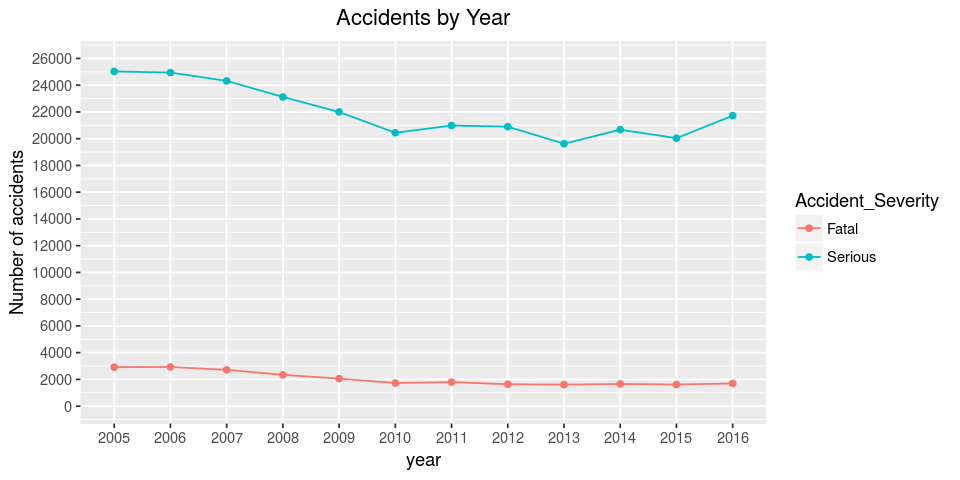

In [49]:
# Plot accidents by year

require(repr)
options(repr.plot.width = 8, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(year,Freq, group=Accident_Severity, color=Accident_Severity),data=by_year) +
    geom_line() +
    geom_point() +
    scale_y_continuous(limits=c(0,26000), breaks = seq(0,26000,2000)) +
    ylab('Number of accidents') +
    ggtitle('Accidents by Year') +
    theme(plot.title = element_text(hjust = 0.5))
    

- **Fatal accidents** declined from 2005 - 2010 and seems to be consistent since then.
- **Serious accidents** also followed a declining trend from 2005 - 2010, remained almost consistent till 2012 and declined in 2013. 2016 recorded high again.

In [50]:
# Aggregate accidents (fatal + serious) by month

by_month <- table(FINAL$Month, FINAL$Accident_Severity)

colnames(by_month) <- c('Fatal','Serious')

by_month <- data.frame(by_month)
colnames(by_month) <- c('Month','Accident_Severity','Freq')

head(by_month)

Month,Accident_Severity,Freq
January,Fatal,2008
February,Fatal,1747
March,Fatal,1875
April,Fatal,1922
May,Fatal,2048
June,Fatal,2003


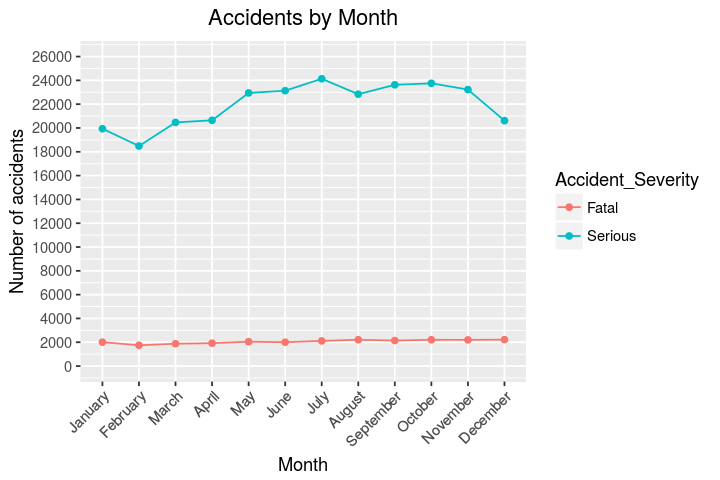

In [51]:
# Plot accidents by Month

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(Month,Freq, group=Accident_Severity, color=Accident_Severity),data=by_month) +
    geom_line() +
    geom_point() +
    scale_y_continuous(limits=c(0,26000), breaks = seq(0,26000,2000)) +
    ylab('Number of accidents') +
    ggtitle('Accidents by Month') +
    theme(axis.text.x = element_text(angle=45, hjust=1)) +
    theme(plot.title = element_text(hjust = 0.5))

- **February** month recorded lowest Serious accidents.
- **March - July** recorded increasing trend in Serious accidents
- **August - December** showed a decreasing trend in Serious accidents
- **Fatal accidents** remained alomost consistent accross months. Showing a slight decline in **February** month.

In [52]:
# Aggregate accidents (fatal + serious) by weekday

by_weekday <- table(FINAL$weekday, FINAL$Accident_Severity)

colnames(by_weekday) <- c('Fatal','Serious')

by_weekday <- data.frame(by_weekday)
colnames(by_weekday) <- c('weekday','Accident_Severity','Freq')

head(by_weekday)

weekday,Accident_Severity,Freq
Sunday,Fatal,3908
Monday,Fatal,3173
Tuesday,Fatal,3172
Wednesday,Fatal,3132
Thursday,Fatal,3287
Friday,Fatal,3784


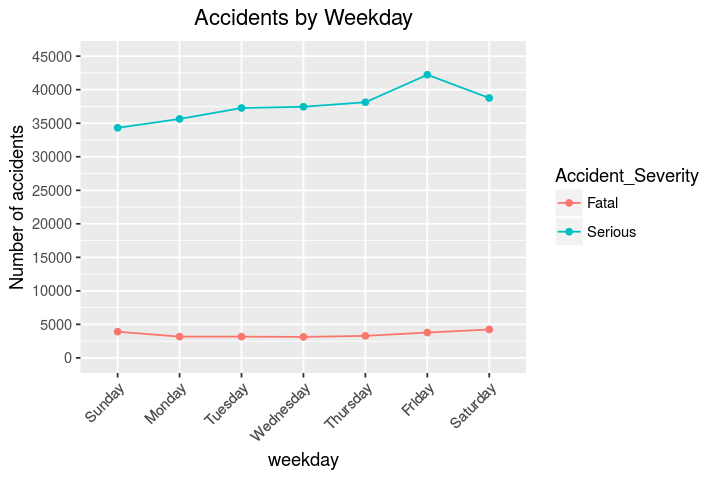

In [53]:
# Plot accidents by Weekday

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(weekday,Freq, group=Accident_Severity, color=Accident_Severity),data=by_weekday) +
    geom_line() +
    geom_point() +
    scale_y_continuous(limits=c(0,45000), breaks = seq(0,45000,5000)) +
    ylab('Number of accidents') +
    ggtitle('Accidents by Weekday') +
    theme(axis.text.x = element_text(angle=45, hjust=1)) +
    theme(plot.title = element_text(hjust = 0.5))

- **Serious accidents** recorded highest on Friday - Is it due to weekend?
- Whereas **Fatal accidents** recorded slightly high on **Friday, Saturday and Sunday** and remained almost consistent in weekdays.

In [54]:
# Aggregate accidents (fatal + serious) by timezone

by_timezone <- table(FINAL$timezone, FINAL$Accident_Severity)

colnames(by_timezone) <- c('Fatal','Serious')

by_timezone <- data.frame(by_timezone)
colnames(by_timezone) <- c('timezone','Accident_Severity','Freq')

by_timezone

timezone,Accident_Severity,Freq
early morning,Fatal,3621
morning,Fatal,5660
afternoon,Fatal,8434
evening,Fatal,6976
early morning,Serious,20913
morning,Serious,65437
afternoon,Serious,108221
evening,Serious,69206


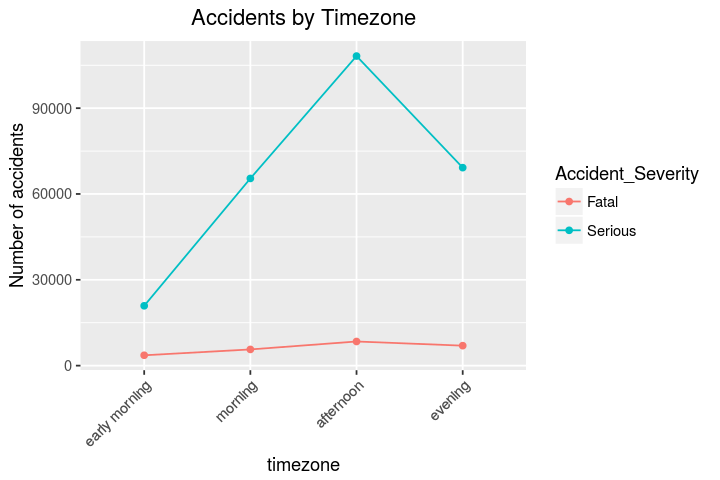

In [55]:
# Plot accidents by timezone

## midnight to 6AM = early morning, 6AM - 12PM = morning, 12PM - 6PM = afternoon, 6PM - 12AM = evening

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(timezone,Freq, group=Accident_Severity, color=Accident_Severity),data=by_timezone) +
    geom_line() +
    geom_point() +
    ylab('Number of accidents') +
    ggtitle('Accidents by Timezone') +
    theme(axis.text.x = element_text(angle=45, hjust=1)) +
    theme(plot.title = element_text(hjust = 0.5))

Both **Serious and Fatal** accidents seems to be high in afternoons (12PM - 6PM)

## Exploring variables of interest to identify those which had influence on accidents

In [56]:
# Accident Severity by Road Type

Sev_road <- round(addmargins(prop.table(table(FINAL$Road_Type, FINAL$Accident_Severity))),2)

colnames(Sev_road) <- c('Fatal','Serious','Sum')
row.names(Sev_road) <- c('Roundabout','One way street','Dual carriageway','Single carriageway','Slip road','Unknown','Sum')

Sev_road

,Fatal,Serious,Sum
Roundabout,0.00,0.04,0.04
One way street,0.00,0.02,0.02
Dual carriageway,0.02,0.12,0.14
Single carriageway,0.07,0.73,0.79
Slip road,0.00,0.01,0.01
Unknown,0.00,0.00,0.00
Sum,0.09,0.91,1.00


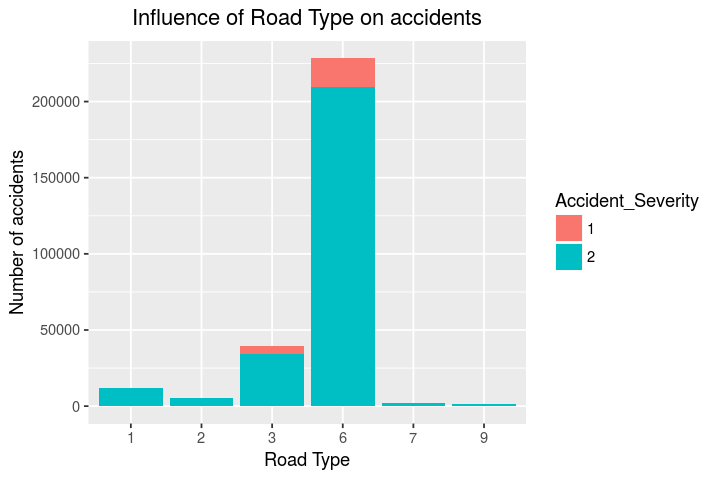

In [57]:
# Influence of Road Type on accidents

## Accident severity 1 = FATAL, Accident severity 2 = SERIOUS
## Road Type 1 = Roundabout, Road Type 2 = One way street, Road Type 3 = Dual carriageway, Road Type 6 = Single carriageway,
## Road Type 7 = Slip road, Road Type 9 = Unknown   

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(Road_Type, fill=Accident_Severity),data=FINAL) +
    geom_bar() +
    xlab('Road Type') +
    ylab('Number of accidents') +
    ggtitle('Influence of Road Type on accidents')+
    theme(plot.title = element_text(hjust = 0.5))

- Most of the **Fatal accidents** occurred in **Dual carriageway** and **Single carriageway**
- Large number of **Serious** accidents occured in **Single carriageway** 

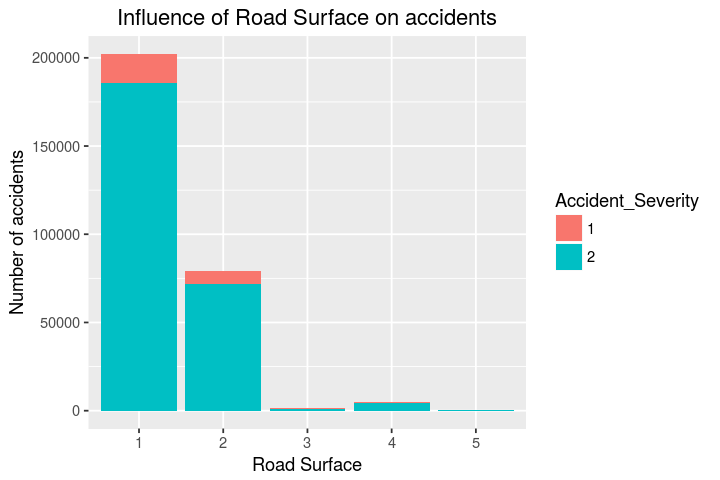

In [58]:
# Influence of Road Surface Conditions on Accidents

## Accident severity 1 = FATAL, Accident severity 2 = SERIOUS
## Road Surface 1 = Dry, Road Surface 2 = Wet or damp, Road Surface 3 = Snow, Road Surface 4 = Frost or ice, 
## Road Surface 5 = Flood over 3cm. deep , Road Surface 6 = Oil or diesel, Road Surface 7 = Mud   

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(Road_Surface_Conditions, fill=Accident_Severity),data=subset(FINAL, !is.na(FINAL$Road_Surface_Conditions))) +
    geom_bar() +
    xlab('Road Surface') +
    ylab('Number of accidents') +
    ggtitle('Influence of Road Surface on accidents')+
    theme(plot.title = element_text(hjust = 0.5))

- Most of the **Fatal accidents** occurred on **dry surface** followed by wet or damp surface.
- **Serious accidents** are high on **dry surface**.

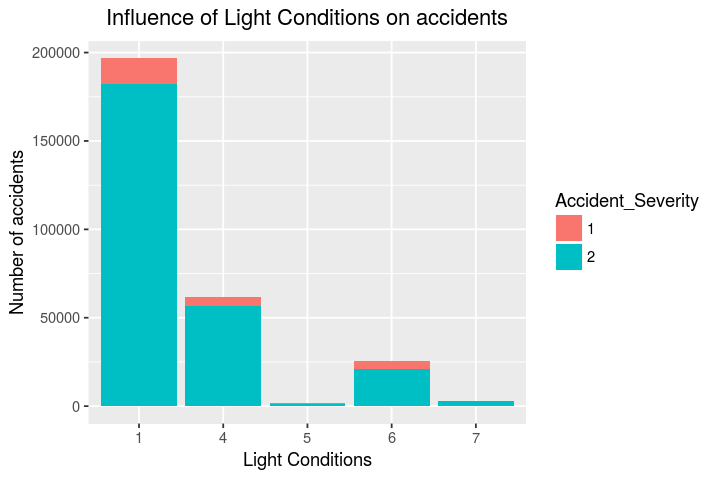

In [59]:
# Influence of light conditions on accidents

## Accident severity 1 = FATAL, Accident severity 2 = SERIOUS
## light conditions 1 = Daylight, light conditions 4 = Darkness - lights lit, light conditions 5 = Darkness - lights unlit,
## light conditions 6 = Darkness - no lighting , light conditions 7 = Darkness - lighting unknown

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(Light_Conditions, fill=Accident_Severity),data=subset(FINAL, !is.na(FINAL$Light_Conditions))) +
    geom_bar() +
    xlab('Light Conditions') +
    ylab('Number of accidents') +
    ggtitle('Influence of Light Conditions on accidents')+
    theme(plot.title = element_text(hjust = 0.5))

- Most of the **Fatal accidents** occurred in **day light** followed by **Darkness - lights lit** and **Darkness - no lighting**
- Accidents that happened due to **Darkness - lights unlit** (which is could be due to negligence) seems to be pretty low.
- **Serious accidents** seems to be pretty high in **day light**

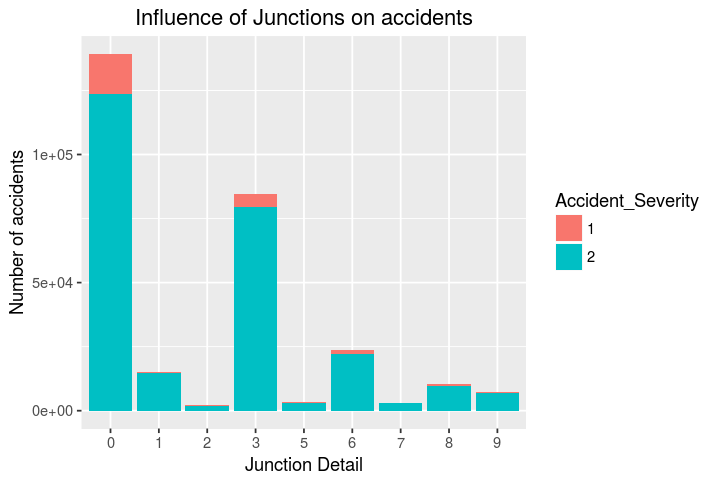

In [60]:
# Influence of Junctions on accidents

## Accident severity 0 = FATAL, Accident severity 2 = SERIOUS
## Junction detail 0 = Not at junction or within 20 metres, Junction detail 1 = Roundabout, 
## Junction detail 2 = Mini-roundabout, Junction detail 3 = T or staggered junction, 
## Junction detail 5 = Slip road , Junction detail 6 = Crossroads, Junction detail 7 = More than 4 arms (not roundabout),
## Junction detail 8 = Private drive or entrance, Junction detail 9 = Other junction

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(Junction_Detail, fill=Accident_Severity),data=subset(FINAL, !is.na(FINAL$Junction_Detail))) +
    geom_bar() +
    xlab('Junction Detail') +
    ylab('Number of accidents') +
    ggtitle('Influence of Junctions on accidents')+
    theme(plot.title = element_text(hjust = 0.5))

- Most of the **Fatal accidents** occured at **Not at junction or within 20 metres** and **T or staggered junction**
- Also, large number of **Serious accidents** occurred at these junctions

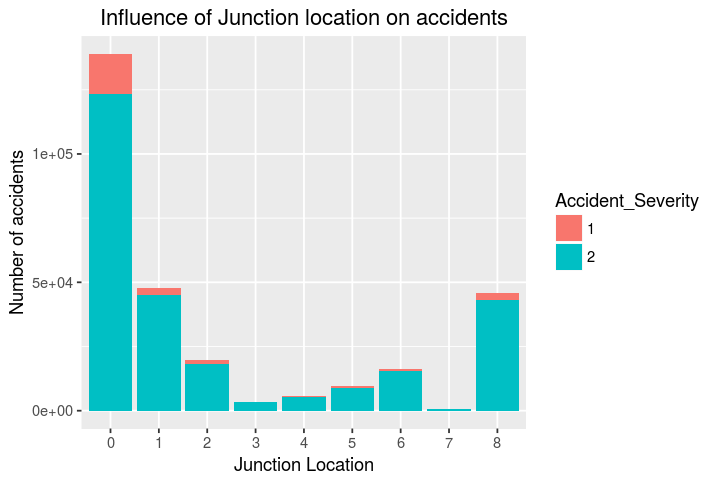

In [61]:
# Influence of Junction location on accidents

## Accident severity 0 = FATAL, Accident severity 2 = SERIOUS
## Junction Location 0 = Not at or within 20 metres of junction, Junction Location 1 = Approaching junction or waiting/parked at junction approach, 
## Junction Location 2 = Cleared junction or waiting/parked at junction exit, Junction Location 3 = Leaving roundabout, 
## Junction Location 4 = Entering roundabout , Junction Location 5 = Leaving main road, Junction Location 6 = Entering main road,
## Junction Location 7 = Entering from slip road, Junction Location 8 = Mid Junction - on roundabout or on main road

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(Junction_Location, fill=Accident_Severity),data=subset(FINAL, !is.na(FINAL$Junction_Location))) +
    geom_bar() +
    xlab('Junction Location') +
    ylab('Number of accidents') +
    ggtitle('Influence of Junction location on accidents')+
    theme(plot.title = element_text(hjust = 0.5))

- Most of the **Fatal accidents** occured at **Not at or within 20 metres of junction**
- Most of the **Serious accidents** occured at **Approaching junction or waiting/parked at junction approach** and **Mid Junction - on roundabout or on main road**
- These junctions need to be considered for setting up digital advertising boards

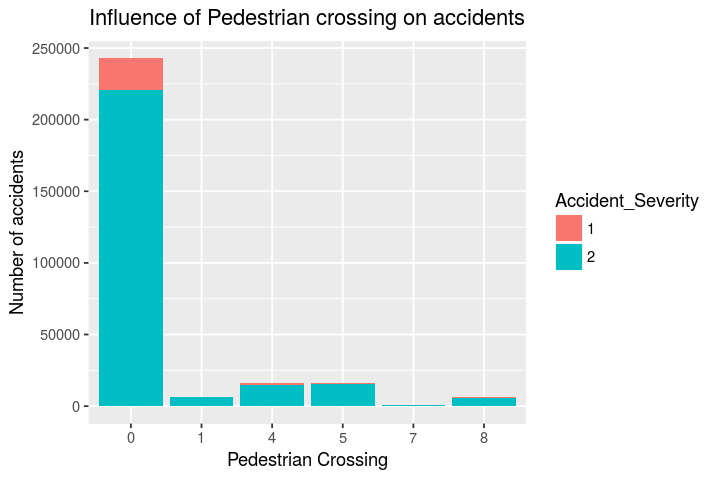

In [62]:
# Influence of Pedestrian crossing (Physical) on accidents

## Accident severity 0 = FATAL, Accident severity 2 = SERIOUS
## Ped cross-Physical 0 = No physical crossing facilities within 50 metres, Ped cross-Physical 1 = Zebra, 
## Ped cross-Physical 4 = Pelican, puffin, toucan or similar non-junction pedestrian light crossing,
## Ped cross-Physical 5 = Pedestrian phase at traffic signal junction , Ped cross-Physical 7 = Footbridge or subway,
## Ped cross-Physical 8 = Central refuge

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(Pedestrian_Crossing.Physical_Facilities, fill=Accident_Severity),data=subset(FINAL, !is.na(FINAL$Pedestrian_Crossing.Physical_Facilities))) +
    geom_bar() +
    xlab('Pedestrian Crossing') +
    ylab('Number of accidents') +
    ggtitle('Influence of Pedestrian crossing on accidents')+
    theme(plot.title = element_text(hjust = 0.5))

- Large number of **Fatal** and **Serious** accidents occured where there are **no physical crossing facilities within 50 metres**
- There is a need for sign boards at these places warning pedestrians that they are not crossing zones or provide crossing facilities at these places if feasible

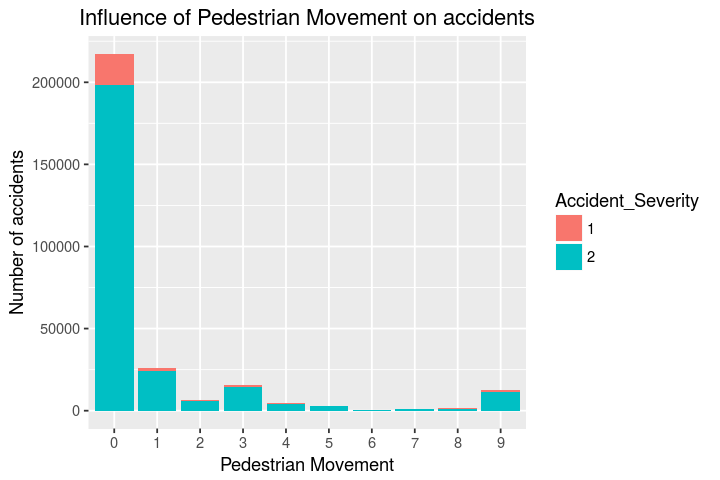

In [63]:
# Influence of Pedestrian Movement on accidents

## Accident severity 0 = FATAL, Accident severity 2 = SERIOUS
## Ped Movement 0 = Not a Pedestrian, Ped Movement 1 = Crossing from driver's nearside, 
## Ped Movement 2 = Crossing from nearside - masked by parked or stationary vehicle,
## Ped Movement 3 = Crossing from driver's offside , Ped Movement 4 = Crossing from offside - masked by  parked or stationary vehicle,
## Ped Movement 5 = In carriageway, stationary - not crossing  (standing or playing),
## Ped Movement 6 = In carriageway, stationary - not crossing  (standing or playing) - masked by parked or stationary vehicle,
## Ped Movement 7 = Walking along in carriageway, facing traffic,
## Ped Movement 8 = Walking along in carriageway, back to traffic, Ped Movement 9 = Unknown or other

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(Pedestrian_Movement, fill=Accident_Severity),data=subset(FINAL, !is.na(FINAL$Pedestrian_Movement))) +
    geom_bar() +
    xlab('Pedestrian Movement') +
    ylab('Number of accidents') +
    ggtitle('Influence of Pedestrian Movement on accidents')+
    theme(plot.title = element_text(hjust = 0.5))

Large number of **Fatal** and **Serious** accidents occured when **no pedestrians are crossing**.   
***Can we assume that animals might have caused these accidents?***  
If that is the case, a sign board is necessary warning drivers to slow down at these places

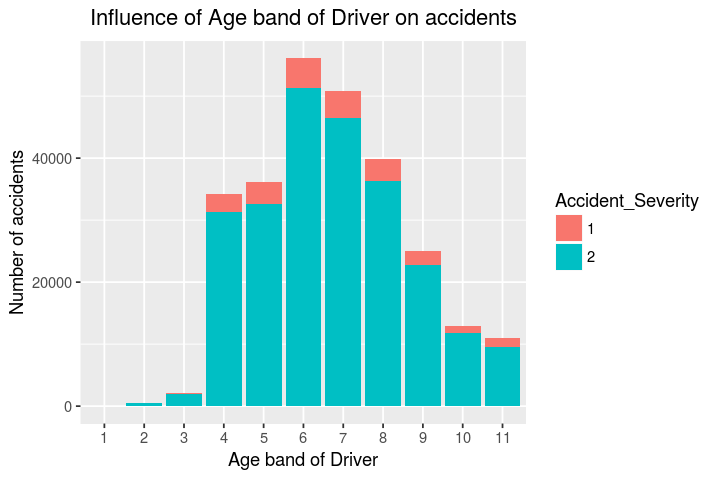

In [64]:
# Influence of Age band of Driver on accidents

## Accident severity 0 = FATAL, Accident severity 2 = SERIOUS
## Age_Band_of_Driver 1 = 0 - 5, Age_Band_of_Driver 2 = 6 - 10, Age_Band_of_Driver 3 = 11 - 15,
## Age_Band_of_Driver 4 = 16 - 20, Age_Band_of_Driver 5 = 21 - 25, Age_Band_of_Driver 6 = 26 - 35,
## Age_Band_of_Driver 7 = 36 - 45, Age_Band_of_Driver 8 = 46 - 55, Age_Band_of_Driver 9 = 56 - 65,
## Age_Band_of_Driver 10 = 66 - 75, Age_Band_of_Driver 11 = Over 75

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(Age_Band_of_Driver, fill=Accident_Severity),data=subset(FINAL, !is.na(FINAL$Age_Band_of_Driver))) +
    geom_bar() +
    xlab('Age band of Driver') +
    ylab('Number of accidents') +
    ggtitle('Influence of Age band of Driver on accidents')+
    theme(plot.title = element_text(hjust = 0.5))

- The above chart is almost following a normal distribution.
- Most of the accidents were committed by people between the **ages 16-65**.
- Highest number of accidents (both Fatal and Serious) were committed by people between the **ages 26-35**.
- There is a serious need of counselling for people between the ages 26 - 35

### Top 20 Local authority districts which recorded high number of accidents

In [65]:
# Top 20 Local authority districts which recorded high number of accidents

library(dplyr)
require(reshape2)

by_district <- table(FINAL$Local_Authority_.District., FINAL$Accident_Severity)

colnames(by_district) <- c('Fatal','Serious')

by_district <- data.frame(by_district)

colnames(by_district) <- c('District','Accident_Severity','Freq')

new_by_district <- dcast(by_district, District ~ Accident_Severity, sum)
new_by_district$Total_accidents <- new_by_district$Fatal + new_by_district$Serious
rank_district <- new_by_district[with(new_by_district, order(-Total_accidents)),]

# rank district by descending order of total accidents
rank_district$rank <- as.integer(rank(-rank_district$Total_accidents, ties.method='first'))

new_rank_district <- rank_district %>%
                       select(District, Fatal, Serious, Total_accidents, rank) %>%
                       dplyr::filter(rank >= 1 & rank <=20)

new_rank_district$District_Name <- LA_district$label[match(new_rank_district$District,LA_district$District.code)]
new_rank_district


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: reshape2
Using Freq as value column: use value.var to override.


District,Fatal,Serious,Total_accidents,rank,District_Name
300,313,4549,4862,1,Birmingham
204,249,3406,3655,2,Leeds
926,160,2409,2569,3,Glasgow City
91,124,2409,2533,4,Liverpool
1,112,2338,2450,5,Westminster
200,177,2266,2443,6,Bradford
215,127,2137,2264,7,Sheffield
231,213,1910,2123,8,East Riding of Yorkshire
102,158,1963,2121,9,Manchester
923,99,1870,1969,10,"Edinburgh, City of"


As these top 20 districts recorded high number of accidents from 2005 - 2016, the organizations which are working on road safety should work with these district authorities to improve road safety conditions.

### Top 20 Highway authorities which recorded high number of accidents

In [66]:
# Top 20 Highway authorities of highways which recorded high number of accidents

library(dplyr)
require(reshape2)

by_highway <- table(FINAL$Local_Authority_.Highway., FINAL$Accident_Severity)

colnames(by_highway) <- c('Fatal','Serious')

by_highway <- data.frame(by_highway)

colnames(by_highway) <- c('Highway','Accident_Severity','Freq')

new_by_highway <- dcast(by_highway, Highway ~ Accident_Severity, sum)
new_by_highway$Total_accidents <- new_by_highway$Fatal + new_by_highway$Serious
rank_highway <- new_by_highway[with(new_by_highway, order(-Total_accidents)),]

# rank highway by descending order of total accidents
rank_highway$rank <- as.integer(rank(-rank_highway$Total_accidents, ties.method='first'))

new_rank_highway <- rank_highway %>%
                     select(Highway, Fatal, Serious, Total_accidents, rank) %>%
                     dplyr::filter(rank >= 1 & rank <=20)

new_rank_highway$highway_auth_Name <- LA_highway$Label[match(new_rank_highway$Highway,LA_highway$Highway.authority.Code)]
new_rank_highway

Using Freq as value column: use value.var to override.


Highway,Fatal,Serious,Total_accidents,rank,highway_auth_Name
E10000017,535,7420,7955,1,Lancashire
E10000012,577,7243,7820,2,Essex
E10000014,524,7024,7548,3,Hampshire
E10000016,692,6131,6823,4,Kent
E10000030,425,6045,6470,5,Surrey
E10000023,522,4791,5313,6,North Yorkshire
E10000032,377,4511,4888,7,West Sussex
E08000025,313,4549,4862,8,Birmingham
E10000015,402,4358,4760,9,Hertfordshire
E10000024,390,4234,4624,10,Nottinghamshire


As high number of accidents from 2005 - 2016 were recorded in the areas which come under these highway authorities, these highways can be looked at for putting up **digital advertising boards.**

In [67]:
# Top 20 LSOA of accident locations which recorded high number of accidents
## LSOA - Lower layer Super Output Area which is a geograhic area - designed to improve the reporting of
## small area statistics in England and Wales

library(dplyr)
require(reshape2)

FINAL_LSOA_NONA <- subset(FINAL, !is.na(FINAL$LSOA_of_Accident_Location))

by_LSOA <- table(FINAL_LSOA_NONA$LSOA_of_Accident_Location, FINAL_LSOA_NONA$Accident_Severity)

colnames(by_LSOA) <- c('Fatal','Serious')

by_LSOA <- data.frame(by_LSOA)

colnames(by_LSOA) <- c('LSOA','Accident_Severity','Freq')

new_by_LSOA <- dcast(by_LSOA, LSOA ~ Accident_Severity, sum)
new_by_LSOA$Total_accidents <- new_by_LSOA$Fatal + new_by_LSOA$Serious
rank_LSOA <- new_by_LSOA[with(new_by_LSOA, order(-Total_accidents)),]

# rank LSOA by descending order of total accidents
rank_LSOA$rank <- as.integer(rank(-rank_LSOA$Total_accidents, ties.method='first'))

new_rank_LSOA <- rank_LSOA %>%
                     select(LSOA, Fatal, Serious, Total_accidents, rank) %>%
                     dplyr::filter(rank >= 1 & rank <=20)


new_rank_LSOA$LSOA_Name <- LSOA$Area[match(new_rank_LSOA$LSOA,LSOA$LSOA)]
new_rank_LSOA

Using Freq as value column: use value.var to override.


LSOA,Fatal,Serious,Total_accidents,rank,LSOA_Name
E01000004,9,336,345,1,City of London 001D
E01004736,10,217,227,2,Westminster 018C
E01011365,8,169,177,3,Leeds 084A
E01018648,21,129,150,4,Macclesfield 007C
E01016952,4,144,148,5,Brighton and Hove 027A
E01004764,5,139,144,6,Westminster 013C
E01008440,5,127,132,7,Newcastle upon Tyne 024F
E01032739,4,127,131,8,City of London 001F
E01021800,10,117,127,9,Epping Forest 003C
E01013869,3,110,113,10,Nottingham 033A


**Westminster** LSOA appeared 6 times in top 20 LSOA's which recorded high accidents

## Observations:

- **Westminster** and **City of London** which are in top 20 LSOA's need to be considered for putting up digital advertising sign boards. As **Westmister appeared 6 times and City of London appeared twice in top 20 LSOA's.**
- Organizations working on road safety should work with top 20 district authorities (listed above) in improving road safety.
- As high number of accidents from 2005 - 2016 were recorded on highways which comes under the top 20 highway authorities (listed above), these highways should be considered for putting up digital advertising boards.
- Most of the **Fatal accidents** occurred in **Dual carriageway** and **Single carriageway** - These road types need to be considered for sign boards
- Most of the **Fatal & Serious accidents** occured at **Not at junction or within 20 metres** and **T or staggered junction.** Which means sign boards should not only be targeted at junctions but also at **non-juctions.**
- Most of the **Fatal accidents** occured at **Not at or within 20 metres of junction** and most of the **Serious accidents** occured at **Approaching junction or waiting/parked at junction approach** and **Mid Junction - on roundabout or on main road**. So, we need to watch out for these junction locations.
- Large number of **Fatal and Serious accidents** occured where there are **no physical crossing facilities within 50 metres**. There is a need for sign boards at these places warning pedestrians that these are not crossing zones or provide crossing facilities at these places if feasible.
- Large number of **Fatal and Serious accidents** occured when **no pedestrians are crossing.** Can we assume that animals might have caused these accidents? If that is the case, a sign board is necessary warning drivers to slow down at these places.
- Highest number of accidents (both Fatal and Serious) were committed by people between the **ages 26-35**. There is a serious need of counselling for people in this age group.